In [1]:
import pandas as pd

# CSV dosyalarının yollarını belirleyin
paths = [
    "/home/biolab/Projects/LAMs_wd/results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUSC_patients/Background/deconv_2/merge_luad_background.csv",
    "/home/biolab/Projects/LAMs_wd/results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUSC_patients/Tumour/deconv_2/merge_tumour.csv",
    "/home/biolab/Projects/LAMs_wd/results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUSC_patients/Healthy/deconv_2/merge_luad_normal.csv",
    "/home/biolab/Projects/LAMs_wd/results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUAD_patients/Background/deconv_2/merge_luad_background.csv",
    "/home/biolab/Projects/LAMs_wd/results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUAD_patients/Tumour/deconv_2/merge_luad_tumour.csv",
    "/home/biolab/Projects/LAMs_wd/results/cell2location/spatial_model_SC_Y_sig_matrix_adeno_LUAD_patients/Healthy/deconv_2/merge_luad_normal.csv"
]

# CSV dosyalarını okuma ve listeye ekleme
dfs = []
for path in paths:
    df = pd.read_csv(path)  # Dosyayı oku
    dfs.append(df)  # Listeye ekle

# DataFrame'leri birleştir
combined_df = pd.concat(dfs, ignore_index=True)

# Birleştirilmiş veriyi bir CSV dosyasına kaydet
combined_df.to_csv("/home/biolab/Projects/LAMs_wd/results/cell2location/merged_all.csv", index=False)


/home/ozlemtuna/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


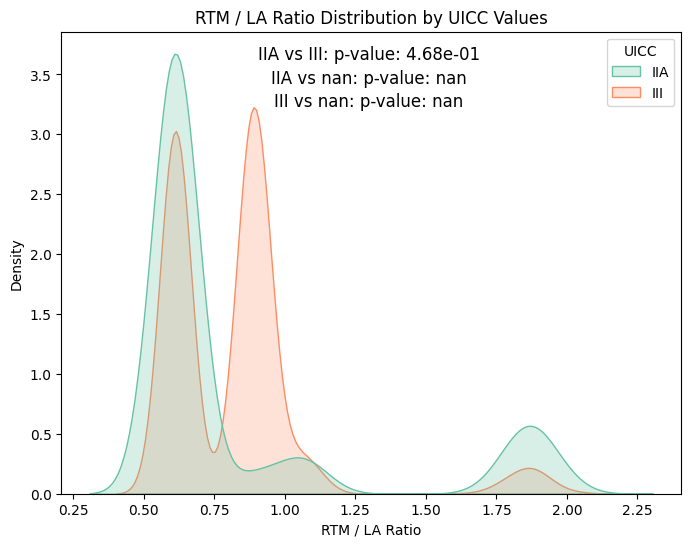

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools

# Load the data from the CSV file
df = pd.read_csv('/home/biolab/Projects/LAMs_wd/results/cell2location/merged_all.csv')

# Calculate RTM / LA ratio
df['RTM_LA_ratio'] = df['RTM_TAMs'] / df['LA_TAMs']

# Exclude rows where TissueStage is "Normal"
df_filtered = df[df['TissueStage'] != 'Normal']

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the distribution of RTM_LA_ratio by UICC, excluding "Normal" TissueStage
sns.kdeplot(data=df_filtered, x="RTM_LA_ratio", hue="UICC", fill=True, palette="Set2", common_norm=False)

# Get unique values of UICC
uicc_values = df_filtered['UICC'].unique()

# Perform pairwise t-tests for each combination of UICC values
for uicc1, uicc2 in itertools.combinations(uicc_values, 2):
    group1 = df_filtered[df_filtered['UICC'] == uicc1]['RTM_LA_ratio']
    group2 = df_filtered[df_filtered['UICC'] == uicc2]['RTM_LA_ratio']
    
    # Perform t-test and get p-value
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Add significance stars based on the p-value
    star = ''
    if p_value < 0.001:
        star = '***'
    elif p_value < 0.01:
        star = '**'
    elif p_value < 0.05:
        star = '*'
    
    # Add p-value and stars to the plot
    # Adjust the text position for each pair of UICC values
    plt.text(0.5, 0.95 - 0.05 * (list(itertools.combinations(uicc_values, 2)).index((uicc1, uicc2))), 
             f"{uicc1} vs {uicc2}: p-value: {p_value:.2e} {star}", 
             ha="center", va="center", fontsize=12, color="black", transform=plt.gca().transAxes)

# Set plot title and labels
plt.title(f"RTM / LA Ratio Distribution by UICC Values")
plt.xlabel("RTM / LA Ratio")
plt.ylabel("Density")

# Display the plot
plt.show()



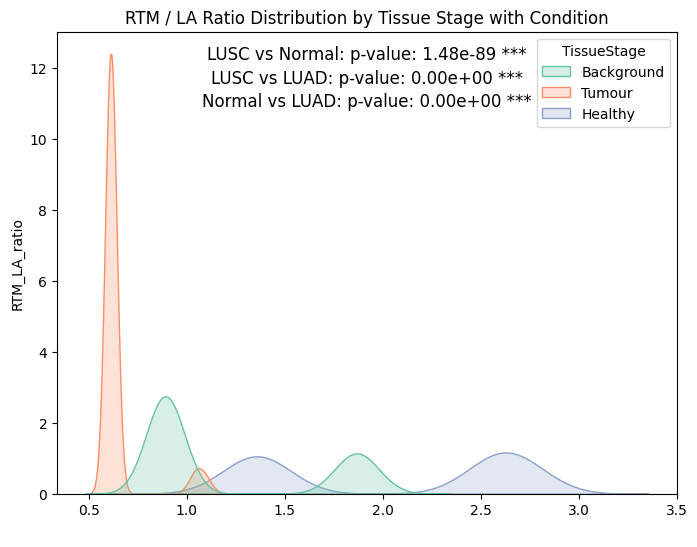

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools

# Calculate the RTM / LA ratio
df['RTM_LA_ratio'] = df['RTM_TAMs'] / df['LA_TAMs']

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the distribution of RTM_LA_ratio by TissueStage
sns.kdeplot(data=df, x="RTM_LA_ratio", hue="TissueStage", fill=True, palette="Set2", common_norm=False)

# Get unique conditions from the 'Condition' column
conditions = df['Condition'].unique()

# Perform pairwise t-tests for each combination of conditions
for condition1, condition2 in itertools.combinations(conditions, 2):
    group1 = df[df['Condition'] == condition1]['RTM_LA_ratio']
    group2 = df[df['Condition'] == condition2]['RTM_LA_ratio']
    
    # Perform t-test and calculate p-value
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Add stars based on the p-value
    star = ''
    if p_value < 0.001:
        star = '***'
    elif p_value < 0.01:
        star = '**'
    elif p_value < 0.05:
        star = '*'
    
    # Add p-value and stars to the plot
    # Adjust text positioning on the plot
    plt.text(0.5, 0.95 - 0.05 * (list(itertools.combinations(conditions, 2)).index((condition1, condition2))), 
             f"{condition1} vs {condition2}: p-value: {p_value:.2e} {star}", 
             ha="center", va="center", fontsize=12, color="black", transform=plt.gca().transAxes)

# Set plot titles and labels
plt.title(f"RTM / LA Ratio Distribution by Tissue Stage with Condition")
plt.xlabel(" ")
plt.ylabel("RTM_LA_ratio")

# Display the plot
plt.show()


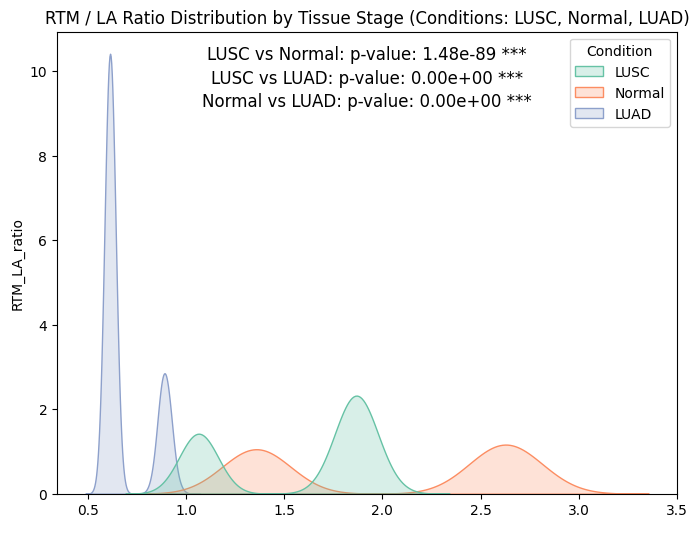

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools

# Calculate the RTM / LA ratio
df['RTM_LA_ratio'] = df['RTM_TAMs'] / df['LA_TAMs']

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the distribution of RTM_LA_ratio by TissueStage
sns.kdeplot(data=df, x="RTM_LA_ratio", hue="Condition", fill=True, palette="Set2", common_norm=False)

# Get unique conditions from the 'Condition' column
conditions = df['Condition'].unique()

# Perform pairwise t-tests for each combination of conditions
for condition1, condition2 in itertools.combinations(conditions, 2):
    group1 = df[df['Condition'] == condition1]['RTM_LA_ratio']
    group2 = df[df['Condition'] == condition2]['RTM_LA_ratio']
    
    # Perform t-test and calculate p-value
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Add stars based on the p-value
    star = ''
    if p_value < 0.001:
        star = '***'
    elif p_value < 0.01:
        star = '**'
    elif p_value < 0.05:
        star = '*'
    
    # Add p-value and stars to the plot
    # Adjust text positioning on the plot
    plt.text(0.5, 0.95 - 0.05 * (list(itertools.combinations(conditions, 2)).index((condition1, condition2))), 
             f"{condition1} vs {condition2}: p-value: {p_value:.2e} {star}", 
             ha="center", va="center", fontsize=12, color="black", transform=plt.gca().transAxes)

# Set plot titles and labels
plt.title(f"RTM / LA Ratio Distribution by Tissue Stage (Conditions: {', '.join(conditions)})")
plt.xlabel(" ")
plt.ylabel("RTM_LA_ratio")

# Display the plot
plt.show()
